make_exclusive_or ---
===

* 0:00 min | Ultima modificación: Septiembre 27, 2021 | [YouTube]

Generate a random exclusive or problem.

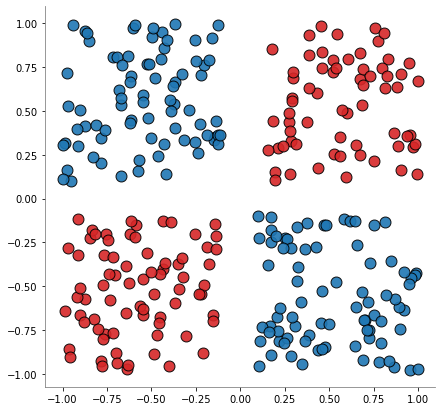

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng


def make_exclusive_or(
    n_samples=200,
    noise=0,
    shuffle=False,
    random_state=None,
):

    if random_state is None:
        rng = default_rng()
    else:
        rng = default_rng(12345)

    x1 = rng.uniform(low=-0.9, high=0.9, size=n_samples)
    x2 = rng.uniform(low=-0.9, high=0.9, size=n_samples)

    x1 = x1 + np.where(x1 < 0, -0.1, +0.1)
    x2 = x2 + np.where(x2 < 0, -0.1, +0.1)

    X = np.column_stack((x1, x2))

    y = np.sign(X[:, 0]) * np.sign(X[:, 1])

    X[X[:, 0] < 0] = X[X[:, 0] < 0]

    X = X + rng.normal(scale=noise, size=(n_samples, 2))
    y = np.where(y < 0, 0, 1)
    return X, y


X, y = make_exclusive_or(
    n_samples=300,
    noise=0.0,
)

plt.figure(figsize=(7, 7))
plt.scatter(
    X[y == 0, 0],
    X[y == 0, 1],
    color="tab:blue",
    edgecolors="k",
    s=120,
    alpha=0.9,
)

plt.scatter(
    X[y == 1, 0],
    X[y == 1, 1],
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)